#  Piso 2

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import pytz
%matplotlib inline

In [3]:
#df1 = pd.read_excel('/content/drive/MyDrive/Proyecto de Título -Localización y gestión de equipamiento médico/Proyecto/Codigo-HBQP/Conexión nodos-HBQP-piso-1.xlsx')
#df2 = pd.read_excel('/content/drive/MyDrive/Proyecto de Título -Localización y gestión de equipamiento médico/Proyecto/Codigo-HBQP/Conexión enlaces-HBQP-piso-1.xlsx')

In [4]:
df1 = pd.read_excel('Conexión nodos-HBQP-piso2.xlsx')
df2 = pd.read_excel('Conexión enlaces-HBQP-piso2.xlsx')

In [5]:
df1 = df1.replace(np.nan, '')

In [6]:
df2.head(5)

,Nodo1,Nodo2,Piso
0,B-2-18,APAT-4,piso 2
1,B-2-4,APAT-6,piso 2
2,B-2-5,APAT-7,piso 2
3,B-2-6,APAT-10,piso 2
4,B-2-7,APAT-10,piso 2


In [7]:
# inicializamos el grafo
G = nx.Graph()

In [8]:
# asignamos nodos al grafo
for idx in range(df1.shape[0]):
    G.add_node(df1['Nodo'][idx], Planta=df1['Piso'][idx])

In [9]:
print(idx)

358


## Enlaces

In [10]:
# asignamos los enlaces al grafo
for idx in range(df2.shape[0]):
    for idx2 in range(df1.shape[0]):
        if df1['Nodo'][idx2] == df2['Nodo1'][idx]:
            var1 = np.array([df1['Distancia x'][idx2],df1['Distancia y'][idx2]])
    
        elif df1['Nodo'][idx2] == df2['Nodo2'][idx]:
            var2 = np.array([df1['Distancia x'][idx2],df1['Distancia y'][idx2]])

    distancia = np.sqrt(np.sum((var1-var2)**2))      
    G.add_edge(df2['Nodo1'][idx], df2['Nodo2'][idx], Planta=df2['Piso '][idx], distancia=distancia)

## Generación de Red


In [11]:
# generamos el vector de posicion para estandarizar las coordenadas de la red
pos = []
for idx2 in range(df1.shape[0]):
    tupla_coor = (df1['Distancia x'][idx2],df1['Distancia y'][idx2])
    nombre = df1['Nodo'][idx2]
    pos.append([nombre,tupla_coor])
pos = dict(pos)
#pos

In [12]:
#Generamos  vector de posicion para los nombres
pos_t = []
for idx2 in range(130):
    tupla_coor_t = (df1['Cor_tex x'][idx2],df1['Cor_tex y'][idx2],df1['rotacion'][idx2])
    nombre = df1['Nodo'][idx2]
    pos_t.append([nombre,tupla_coor_t])
pos_t = dict(pos_t)
#print(pos_t)
pos_te = []
for idx2 in range(335,359):
    tupla_coor_te = (df1['Cor_tex x'][idx2],df1['Cor_tex y'][idx2],df1['rotacion'][idx2])
    nombre = df1['Nodo'][idx2]
    pos_te.append([nombre,tupla_coor_te])
pos_te = dict(pos_te)
print(pos_te)

{'ESC 1': (3.0, -22.0, 0), 'ESC 2': (197.0, -19.0, 0), 'ESC 3': (412.0, -19.0, 0), 'ESC 5': (16.0, -210.0, 0), 'ESC 6': (464.0, -150.0, 0), 'ESC 7': (95.0, 139.0, 0), 'ESC 8': (125.0, 134.0, 0), 'ESC 9': (364.0, 194.0, 0), 'ESC 10': (382.0, 194.0, 0), 'ASC C-EQ 1': (63.0, -16.0, 0), 'ASC C-EQ 2': (227.0, 4.0, 90), 'ASC C-EQ 3': (463.0, -16.0, 0), 'ASC C-EQ 4': (305.0, -180.0, 90), 'ASC C-EQ 5': (38.0, 23.0, 0), 'ASC C-EQ 6': (268.0, 19.0, 0), 'ASC P 1': (28.0, -35.0, 0), 'ASC P 2': (199.0, -32.0, 0), 'ASC P 3': (448.0, -30.0, 0), 'ASC P 4': (295.0, -155.0, 0), 'ASC P 5': (442.0, -135.0, 90), 'ASC P 6': (38.0, 9.0, 0), 'ASC P 7': (315.0, 31.0, 0), 'ASC P 8': (411.0, 24.0, 0), 'ASC P 9': (411.0, 16.0, 0)}


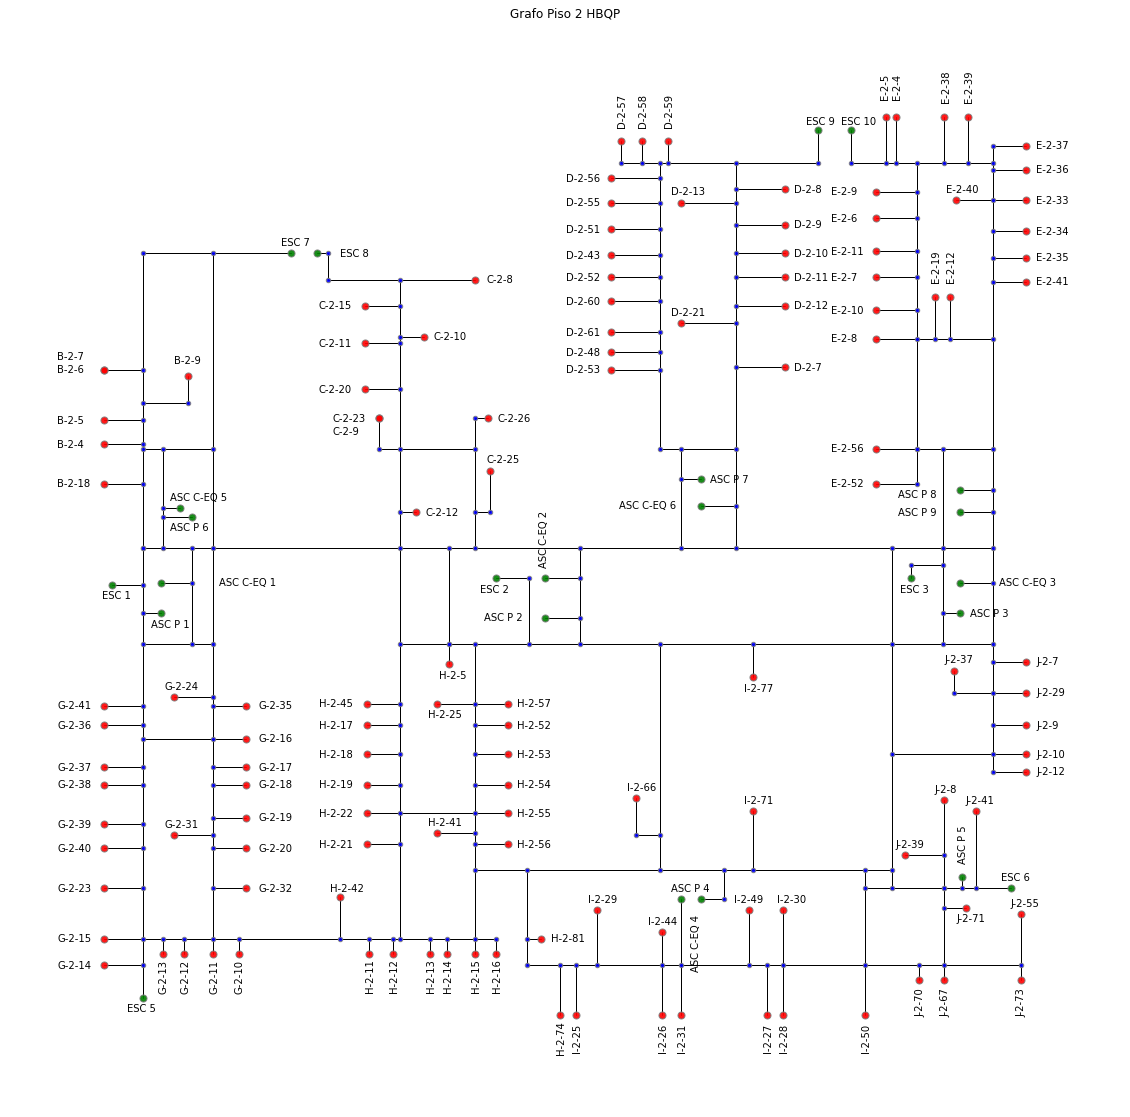

In [13]:
# generamos un data frame solo con los nodos para poder graficar
df_nodes = pd.DataFrame({'Nodos':G.nodes})
fig = plt.figure(figsize=(20,20))
plt.title('Grafo Piso 2 HBQP') 
# opciones que se repiten en todos los nodos
options = {"edgecolors": "tab:gray", "alpha": 0.9}
# mostramos todos los nodos de los pasillos
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[0:130]), node_color = "r",node_size=50, **options)
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[130:335]), node_color = "b",node_size=20, **options)
nx.draw(G,pos, nodelist=list(df_nodes.Nodos.iloc[335:359]), node_color = "g",node_size=50, **options)
for n in df_nodes.Nodos.iloc[:130]:
    plt.text(pos_t[n][0],pos_t[n][1],s=n,fontsize=10,verticalalignment='center',rotation=pos_t[n][2])
for n in df_nodes['Nodos'].iloc[335:359]:
    plt.text(pos_te[n][0],pos_te[n][1],s=n,fontsize=10,verticalalignment='center',rotation=pos_te[n][2])
plt.savefig("Grafo Piso 2 HBQP.png",dpi=300,bbox_inches='tight')
plt.show()